# ETL Pipeline Preparation
Follow the instructions below to help you create your ETL pipeline.
### 1. Import libraries and load datasets.
- Import Python libraries
- Load `messages.csv` into a dataframe and inspect the first few lines.
- Load `categories.csv` into a dataframe and inspect the first few lines.

In [83]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [84]:
# load messages dataset
messages_df = pd.read_csv("messages.csv")
messages_df.head(3)

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct


In [85]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
id          26248 non-null int64
message     26248 non-null object
original    10184 non-null object
genre       26248 non-null object
dtypes: int64(1), object(3)
memory usage: 820.3+ KB


In [86]:
# load categories dataset
categories_df = pd.read_csv("categories.csv")

categories_df.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [87]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
id            26248 non-null int64
categories    26248 non-null object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


### 2. Merge datasets.
- Merge the messages and categories datasets using the common id
- Assign this combined dataset to `df`, which will be cleaned in the following steps

In [88]:
print("messages_df  : "+str(messages_df.shape))
print("categories_df: "+str(categories_df.shape))
messages_df.info()

messages_df  : (26248, 4)
categories_df: (26248, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 4 columns):
id          26248 non-null int64
message     26248 non-null object
original    10184 non-null object
genre       26248 non-null object
dtypes: int64(1), object(3)
memory usage: 820.3+ KB


In [89]:
# merge datasets
df = pd.merge(messages_df, categories_df.drop_duplicates(subset=['id']), how = 'left')
df.head()

,id,message,original,genre,categories
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1;request-0;offer-0;aid_related-0;medi...
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1;request-0;offer-0;aid_related-1;medi...
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1;request-0;offer-0;aid_related-0;medi...
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1;request-1;offer-0;aid_related-1;medi...
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1;request-0;offer-0;aid_related-0;medi...


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26248 entries, 0 to 26247
Data columns (total 5 columns):
id            26248 non-null int64
message       26248 non-null object
original      10184 non-null object
genre         26248 non-null object
categories    26248 non-null object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


### 3. Split `categories` into separate category columns.
- Split the values in the `categories` column on the `;` character so that each value becomes a separate column. You'll find [this method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.str.split.html) very helpful! Make sure to set `expand=True`.
- Use the first row of categories dataframe to create column names for the categories data.
- Rename columns of `categories` with new column names.

In [91]:
# create a dataframe of the 36 individual category columns
categories = categories_df['categories'].str.split(';', expand=True) 
categories.head() 

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [92]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 2 columns):
id            26248 non-null int64
categories    26248 non-null object
dtypes: int64(1), object(1)
memory usage: 410.2+ KB


In [93]:
# select the first row of the categories dataframe
row = categories.iloc[0]

# use this row to extract a list of new column names for categories.
# one way is to apply a lambda function that takes everything 
# up to the second to last character of each string with slicing
category_colnames = [colname[:-2] for colname in row.tolist()]
print(category_colnames)

['related', 'request', 'offer', 'aid_related', 'medical_help', 'medical_products', 'search_and_rescue', 'security', 'military', 'child_alone', 'water', 'food', 'shelter', 'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid', 'infrastructure_related', 'transport', 'buildings', 'electricity', 'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure', 'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold', 'other_weather', 'direct_report']


In [94]:
# rename the columns of `categories`
categories.columns = category_colnames
categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


### 4. Convert category values to just numbers 0 or 1.
- Iterate through the category columns in df to keep only the last character of each string (the 1 or 0). For example, `related-0` becomes `0`, `related-1` becomes `1`. Convert the string to a numeric value.
- You can perform [normal string actions on Pandas Series](https://pandas.pydata.org/pandas-docs/stable/text.html#indexing-with-str), like indexing, by including `.str` after the Series. You may need to first convert the Series to be of type string, which you can do with `astype(str)`.

In [95]:
for column in categories:
    # set each value to be the last character of the string, converted to int
    categories[column] = categories[column].apply(lambda val : int(val[-1]) ) 

categories.head()

,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Check if there are columns with values that differ from [0,1]

for column in categories:
    unique_values_set = set(categories[column].unique())
    if unique_values_set.difference( set([0,1]) ):
        print(column +' : '+ str(unique_values_set))

related : {0, 1, 2}


In [97]:
# How many such rows:
categories['related'][categories['related']==2].sum()

386

We see that there is only one column ('related') that has non-0/1 values, and only a small amount of those.

The rows with bad values (2) will be dropped in the end of cleaning process

### 5. Replace `categories` column in `df` with new category columns.
- Drop the categories column from the df dataframe since it is no longer needed.
- Concatenate df and categories data frames.

In [98]:
# drop the original categories column from `df`
df.drop('categories', axis=1, inplace=True)

df.head()

,id,message,original,genre
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct


In [99]:
# concatenate the original dataframe with the new `categories` dataframe
df = pd.concat([df, categories], axis = 1)
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Remove duplicates.
- Check how many duplicates are in this dataset.
- Drop the duplicates.
- Confirm duplicates were removed.

In [100]:
# check number of duplicates
df.duplicated(subset='message').sum()

71

In [101]:
# drop duplicates
duplicated = df.duplicated(subset='message')
df = df[~duplicated]

In [102]:
# check number of duplicates
df.duplicated().sum()

0

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26177 entries, 0 to 26247
Data columns (total 40 columns):
id                        26177 non-null int64
message                   26177 non-null object
original                  10153 non-null object
genre                     26177 non-null object
related                   26177 non-null int64
request                   26177 non-null int64
offer                     26177 non-null int64
aid_related               26177 non-null int64
medical_help              26177 non-null int64
medical_products          26177 non-null int64
search_and_rescue         26177 non-null int64
security                  26177 non-null int64
military                  26177 non-null int64
child_alone               26177 non-null int64
water                     26177 non-null int64
food                      26177 non-null int64
shelter                   26177 non-null int64
clothing                  26177 non-null int64
money                     26177 non-null i

In [104]:
df['related'].unique()

array([1, 0, 2], dtype=int64)

In [105]:
df[df['related']==2]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,263,. .. i with limited means. Certain patients co...,t avec des moyens limites. Certains patients v...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
305,373,The internet caf Net@le that's by the Dal road...,Cyber cafe net@le ki chita rout de dal tou pr ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
460,565,"Bonsoir, on est a bon repos aprs la compagnie ...",Bonswa nou nan bon repo apri teleko nan wout t...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
576,700,URGENT CRECHE ORPHANAGE KAY TOUT TIMOUN CROIX ...,r et Salon Furterer. mwen se yon Cosmtologue. ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
655,804,elle est vraiment malade et a besoin d'aide. u...,she is really sick she need your help. please ...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,1063,no authority has passed by to see us. We don't...,EN OKENN OTORITE POKO PASE WE NOU NOU PAGEN KO...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,1080,It's Over in Gressier. The population in the a...,Se over toujou nan gresye 24e seksyon komin. P...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
925,1113,we sleep with the baby. Thanks in advance for ...,sa nou demi avek ti bebe. Mesi davans pou d no...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
931,1121,I need help in Jrmie because I was in Port-au-...,MWEN bezwen ed lan jeremi paske mwen te portop...,direct,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Drop rows with 'related' values of 2 (see analysis in section 4) 

drop_index = df[df['related']==2].index
df.drop(drop_index, inplace=True)

# Check that this column is OK now
df['related'].unique()

array([1, 0], dtype=int64)

In [107]:
df.shape

(25989, 40)

### 7. Distribution of categories

Let's see, how our messages are distributed between all categories 

- Find Sum in each category column (from `category_colnames` list);
- Sort in descending order;
- Make a bar plot.


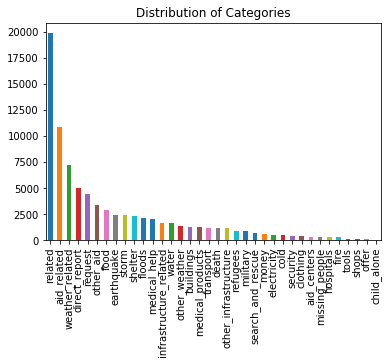

In [108]:
df[category_colnames].sum().sort_values(ascending=False).plot.bar(title="Distribution of Categories");

Apparently, for most categories we have a very unbalanced distribution with too few positive examples. 

### 7. Save the clean dataset into an sqlite database.
You can do this with pandas [`to_sql` method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_sql.html) combined with the SQLAlchemy library. Remember to import SQLAlchemy's `create_engine` in the first cell of this notebook to use it below.

In [109]:
engine = create_engine('sqlite:///DisasterResponse.db')
df.to_sql('messages_categories', engine, index=False, if_exists='replace')

### 8. Use this notebook to complete `etl_pipeline.py`
Use the template file attached in the Resources folder to write a script that runs the steps above to create a database based on new datasets specified by the user. Alternatively, you can complete `etl_pipeline.py` in the classroom on the `Project Workspace IDE` coming later.